### Automatic Fruit Segmentation

Laura M. Zingaretti 
e-mail: m.lau.zingaretti@gmail.com


In [1]:
from Src import load_image
from Src import scanIm
from Src import linearDesc
from Src import Apple_LD
from Src import landmarks_gen
import matplotlib.pyplot as plt
import numpy as np
import pyod
import inspect


In [2]:
import os 


In [3]:
#Img=load_image.load_image(fileName="/Users/teano/Dropbox/fotos-Nikon-experimento-fresas/dia-27-abril-2018/100NCD80/DSC_0493.JPG")
#Img=load_image.load_image(fileName="/Users/teano/Dropbox/fotos-Nikon-experimento-fresas/dia-27-abril-2018/100NCD80/DSC_0500.JPG")
#Img=load_image.load_image(fileName="/Users/teano/Dropbox/fotos-Nikon-experimento-fresas/dia-27-abril-2018/100NCD80/DSC_0422.JPG")

#Img=load_image.load_image(fileName="/Users/teano/Dropbox/fotos-Nikon-experimento-fresas/dia-30-abril-2018/DSC_0767.JPG")

Img=load_image.load_image(fileName=str(os.getcwd()) + "/Examples/DSC_0385.JPG")
#430
#435
#383 mal 
#382

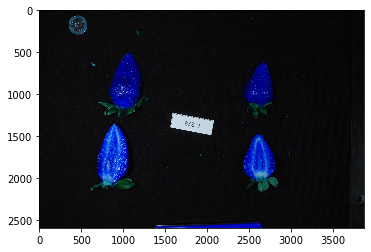

In [4]:
plt.imshow(Img.img)

In [5]:
#see the arguments 
inspect.getfullargspec(Img.agis).args 

['self', 'kernelsize', 'threshold', 'ud', 'dilate', 'erode']

In [6]:
Img.agis()

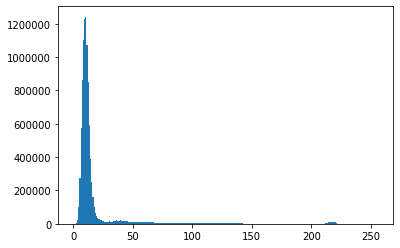

In [7]:
Img.histo()

In [8]:
scanIm.imgObjects.ExtractObjects(Img,label=True,write_output=False,output_size=1000,output_path="~/eje", min_expected_ratio=1.1,max_expected_ratio=3.5)

In [9]:
len(Img.objects)
#number of fruits founded 

4

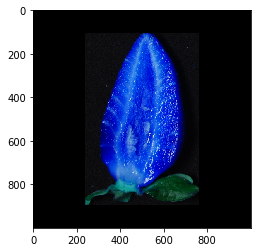

In [10]:
plt.imshow(Img.objects[1])

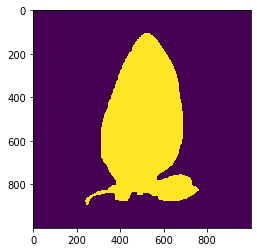

In [11]:
#The mask
plt.imshow(Img.all_masks[1])

### Computing linear descriptors 

See the function arguments 

In [12]:
inspect.getfullargspec(linearDesc.Linear_Descriptors).args 

['self', 'both_sizes', 'leaves', 'mask_']

This function takes as input the ExctractObjects output. The arguments are
- both sizes: logical, indicating if fruits of both sections should be expected. 
- leaves: logical, indicating if the fruits have leaves. The leaves have to be removed prior to compute the linear descriptors.
- mask_ only works if leaves is True, Do you want to compute the slic algorithm to leaves removing on all the image or just inside the fruit? We recomend to compute slic to the whole image, then mask_ should be empty. 

In [13]:
linearDesc.Linear_Descriptors(Img)
# This is the automatic (k-means) classification of the fruits. The 2 first fruits (label 1) 
#correspond to inner fruits 

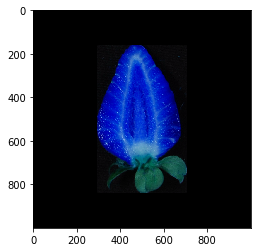

In [14]:
# check 0, 1 inner section
# 2 and 3 outside
plt.imshow(Img.objects[0])

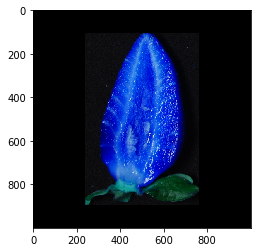

In [15]:
plt.imshow(Img.objects[1])

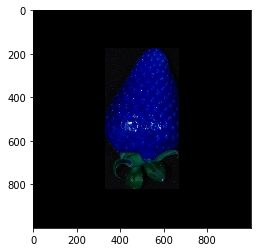

In [16]:
plt.imshow(Img.objects[2])

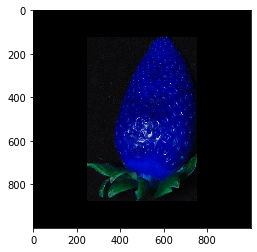

In [17]:
plt.imshow(Img.objects[3])

### Output dataframe

- If fruit of both sections are present, it computes only the measures to the outside after remove the leaves (if necessary). 
- The first column contains the image name, I-273 in this case. 


In [18]:
Img.Linear_Descriptors


,Individuo,Rep,height,width,widht_at_75h,widht_at_25h,widht_at_half_h,Area,Perimeter,Solidiy,AreaReal,circularity,EllipseRatio,l_channel,a_channel,b_channel
0,|-273,1,13.626041,8.493125,8.096250,4.788958,6.746875,106116.5,45.652339,0.917376,74.286154,0.447911,0.554051,35.19330,171.597234,66.463497
0,|-273,2,17.541875,8.995833,8.916458,5.662083,7.831667,152783.0,64.211881,0.927087,106.954729,0.325971,0.472868,43.19994,174.738426,61.503887


### Generating landmarks 

The following code shows the arguments of landmarks_gen function. Basically, it generates landmarks for each of the individuals in the previous dataFrame.
The function takes an input, the output from the previous function. 
- N: is 50 as default, i.e. the number of pseudo-landmarks generated. 
- write_output:  logical. If it is set to True,  the landmarks will be save as data.frame.
- output_path: indicating the path were the landmarks will be save. If none, landmarks will be save at the current directory.

In [19]:
inspect.getfullargspec(landmarks_gen.landmarks_gen).args 

['self', 'N', 'write_output', 'output_path']

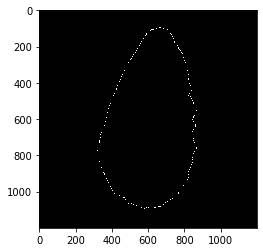

In [20]:
landmarks_gen.landmarks_gen(Img,N=25)

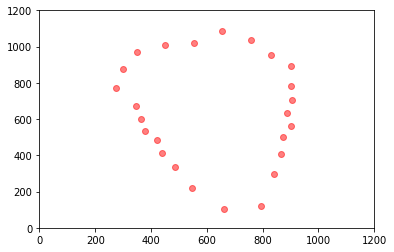

In [21]:
plt.ylim(0, 1200)
plt.xlim(0,1200)
plt.scatter(Img.landmarks[0]["x"], Img.landmarks[0]["y"],  c="red", alpha=0.5)

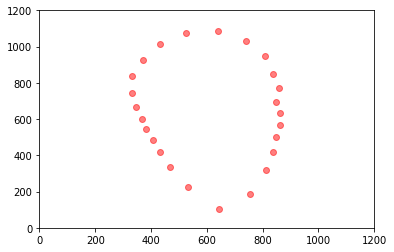

In [22]:
plt.ylim(0, 1200)
plt.xlim(0,1200)
plt.scatter(Img.landmarks[1]["x"], Img.landmarks[1]["y"],  c="red", alpha=0.5)


### Checking fruit without leaves 

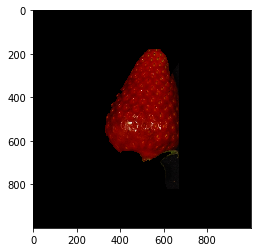

In [23]:
plt.imshow(Img.imgcl[0])

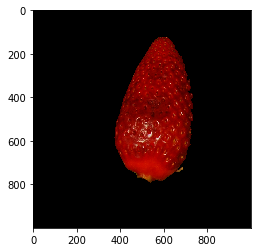

In [24]:
plt.imshow(Img.imgcl[1])

### Other examples

# Apple

In [25]:
Img=load_image.load_image(fileName=str(os.getcwd()) + "/Examples/20201022_194751.jpg")

To Check image histogram 

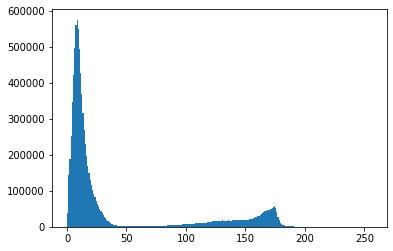

In [26]:
Img.histo()

Print image

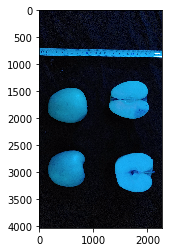

In [27]:
plt.imshow(Img.img)

- Objects extraction 
- agis method (authomatic gray scale image segmentation)

In [28]:
Img.agis()

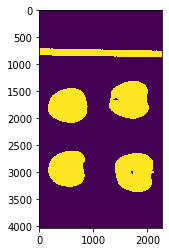

In [29]:
plt.imshow(Img.mask)

In [30]:
# the output will be added to Img 
scanIm.imgObjects.ExtractObjects(Img,label=True,write_output=False,output_path="/Users/teano/Dropbox/DoctoradoCRAG/paper_imagenes_fresa/eje", min_expected_ratio=0.5,max_expected_ratio=1.2,expected_char="0123456789")

In [31]:
Img.id

'File'

In [32]:
len(Img.objects)

4

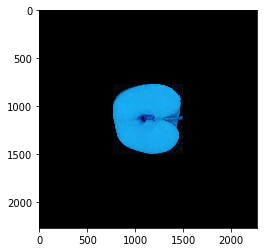

In [33]:
plt.imshow(Img.objects[0])

In [34]:
Apple_LD.Apple_LD(Img,both_sizes=True)

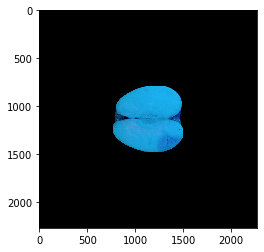

In [35]:
plt.imshow(Img.imgcl[1])

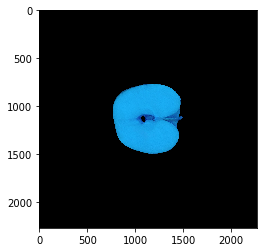

In [36]:
plt.imshow(Img.imgcl[0])

In [37]:
Img.Linear_Descriptors

,Individuo,Rep,height,width,widht_at_75h,widht_at_25h,widht_at_half_h,Area,Perimeter,Solidiy,AreaReal,circularity,EllipseRatio,l_channel,a_channel,b_channel,calix_a,stem_pit_a,mesocarp_area
0,File,1,19.182291,19.182291,18.309166,16.986250,17.806458,429878.5,67.605345,0.980162,300.933600,0.827406,0.951356,23.869097,159.049987,228.346047,0.000000,0.994762,292.645087
0,File,2,18.467916,19.526250,18.917708,17.859375,18.071041,421281.0,65.723365,0.984762,294.914977,0.857960,0.932704,26.626104,153.240278,212.965136,3.839388,26.813062,281.539948


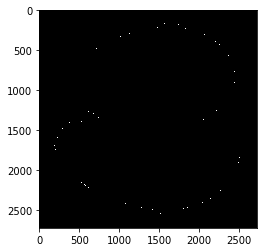

In [38]:
landmarks_gen.landmarks_gen(Img)

In [39]:
Img.imgcl[0].shape

(2272, 2272, 3)

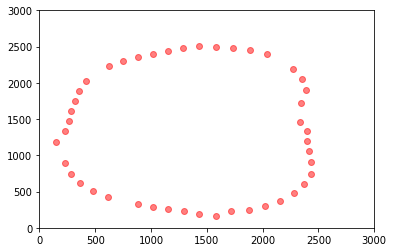

In [40]:
plt.ylim(0, 3000)
plt.xlim(0,3000)
plt.scatter(Img.landmarks[0]["x"], Img.landmarks[0]["y"],  c="red", alpha=0.5)

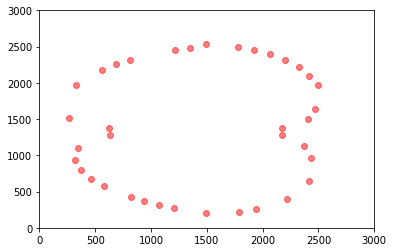

In [41]:
plt.ylim(0, 3000)
plt.xlim(0,3000)
plt.scatter(Img.landmarks[1]["x"], Img.landmarks[1]["y"],  c="red", alpha=0.5)

### Lemon 

In [42]:
Img=load_image.load_image(fileName=str(os.getcwd()) + "/Examples/20201022_195610.jpg")
Img.agis()


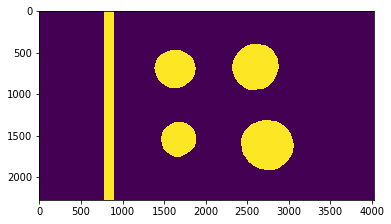

In [43]:
plt.imshow(Img.mask)

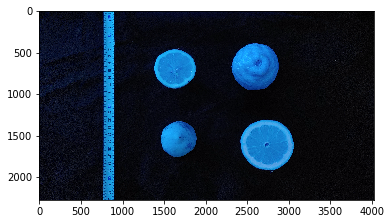

In [44]:
plt.imshow(Img.img)

In [45]:
scanIm.imgObjects.ExtractObjects(Img,min_expected_ratio=0.3)

In [46]:
len(Img.objects)

4

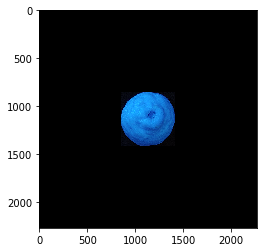

In [47]:
plt.imshow(Img.objects[3])

In [48]:
linearDesc.Linear_Descriptors(Img)

In [49]:
Img.Linear_Descriptors

,Individuo,Rep,height,width,widht_at_75h,widht_at_25h,widht_at_half_h,Area,Perimeter,Solidiy,AreaReal,circularity,EllipseRatio,l_channel,a_channel,b_channel
0,File,1,11.165417,11.218333,9.974792,9.577917,11.218333,139204.0,46.810731,0.976127,97.448839,0.558851,0.956182,122.463157,130.842260,80.413178
0,File,2,14.313958,14.975416,13.123333,12.885208,14.763750,242801.5,56.782730,0.983813,169.971584,0.662451,0.950626,124.657104,136.355883,73.648084


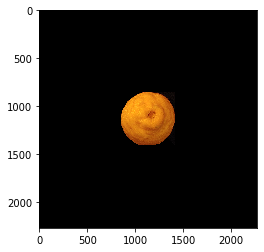

In [50]:
plt.imshow(Img.imgcl[1])

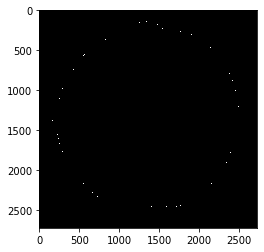

In [51]:
landmarks_gen.landmarks_gen(Img,N=50)

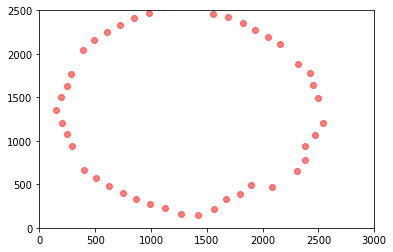

In [52]:
plt.ylim(0, 2500)
plt.xlim(0,3000)
plt.scatter(Img.landmarks[0]["x"], Img.landmarks[0]["y"],  c="red", alpha=0.5)

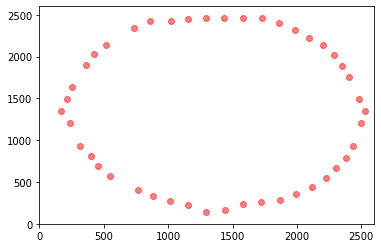

In [53]:
plt.ylim(0, 2600)
plt.xlim(0,2600)
plt.scatter(Img.landmarks[1]["x"], Img.landmarks[1]["y"],  c="red", alpha=0.5)

# Tomato

In [54]:
Img=load_image.load_image(fileName=str(os.getcwd()) + "/Examples/20201022_194125.jpg")
Img.agis()


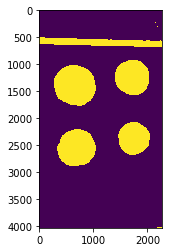

In [55]:
plt.imshow(Img.mask)

In [56]:
scanIm.imgObjects.ExtractObjects(Img,min_expected_ratio=0.3)

In [57]:
len(Img.objects)

4

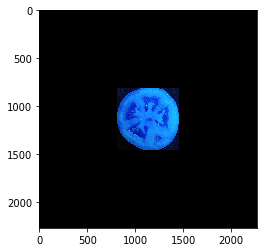

In [58]:
plt.imshow(Img.objects[3])

In [59]:
linearDesc.Linear_Descriptors(Img)

In [60]:
Img.Linear_Descriptors

,Individuo,Rep,height,width,widht_at_75h,widht_at_25h,widht_at_half_h,Area,Perimeter,Solidiy,AreaReal,circularity,EllipseRatio,l_channel,a_channel,b_channel
0,File,1,17.938750,18.626666,16.774583,15.107708,17.039166,369876.5,71.201743,0.960877,258.929597,0.641816,0.931255,89.604515,167.086920,53.551334
0,File,2,15.531041,15.054791,13.361458,12.832292,15.028333,258789.0,56.923778,0.982931,181.163528,0.702576,0.916614,106.220357,159.237766,56.058752


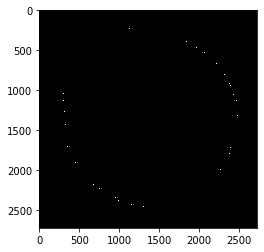

In [61]:
landmarks_gen.landmarks_gen(Img,N=50)